# Машинное обучение, ФКН ВШЭ

## Практическое задание 5

### Общая информация
Дата выдачи: 11.11.2019

Мягкий дедлайн: 1:59MSK 22.11.2019

Жесткий дедлайн: 23:59MSK 23.11.2019

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/15454/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

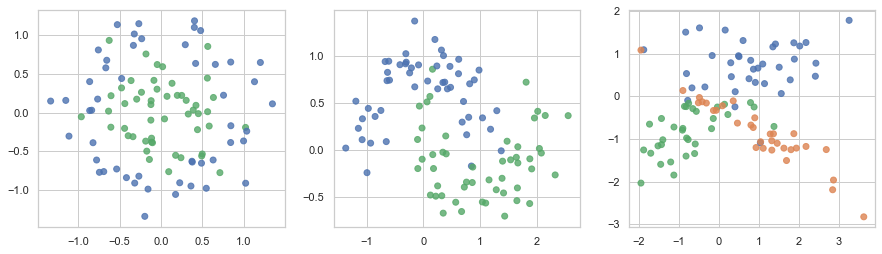

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.figure(figsize=(5*n, 4))
    plt.subplot(1, n, i + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    if (j == -1):
        nubmer = "example"
    if (j == 0):
        nubmer = "first"
    if (j == 1):
        nubmer = "second"
    if (j == 2):
        nubmer = "third"
        
    name = nubmer + " dataset with "
    
    if (d == -1):
        name += "default max_depth and "
    else:
        name += "max_depth = " + str(d) + " and "
    if (s == -1):
        name += "default min_samples_split"
    else:
        name += "min_samples_split = " + str(s)
        
    
        
    
    plt.title(name)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    plt.show()

<Figure size 1080x288 with 0 Axes>

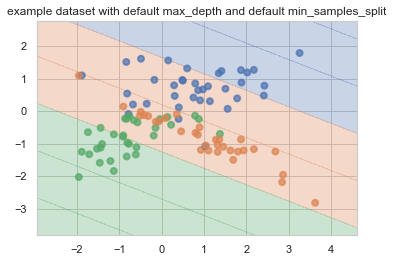

In [6]:
# Пример:
j = -1
d = -1
s = -1 
n = 3
plt.figure(figsize=(15, 4))
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

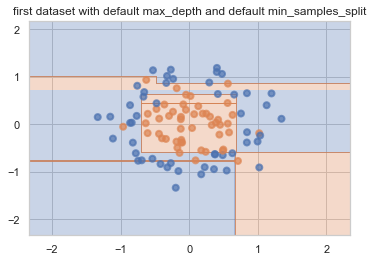

score for train sample is 1.0
score for test sample is 0.7666666666666667


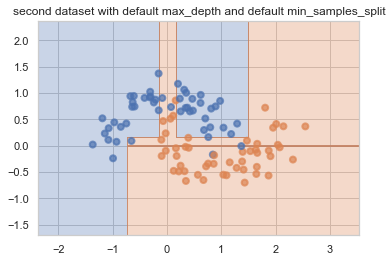

score for train sample is 1.0
score for test sample is 0.8666666666666667


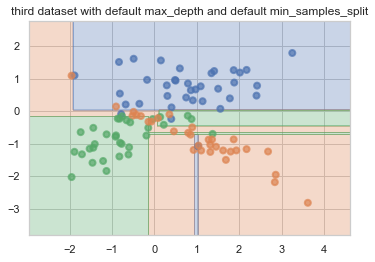

score for train sample is 1.0
score for test sample is 0.8


In [7]:
n = 3
for j in range(n):
    X, y = datasets[j]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)
    clf  = DecisionTreeClassifier().fit(X_train, y_train)
    plot_surface(clf, X, y)
    print("score for train sample is", clf.score(X_train, y_train))
    print("score for test sample is", clf.score(X_test, y_test))

Очевидно, деревья очень сильно переобучились, так как на обучающей выборке score = 1 для всех трех датасетов

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

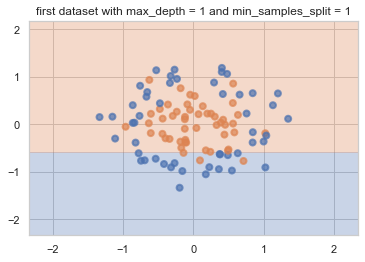

score for train sample is 0.7285714285714285
score for test sample is 0.4666666666666667


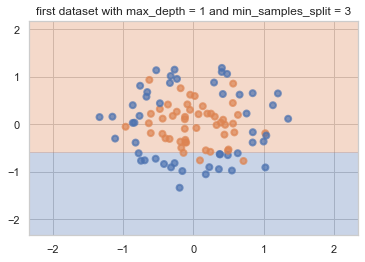

score for train sample is 0.7285714285714285
score for test sample is 0.4666666666666667


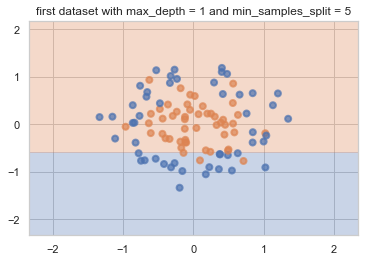

score for train sample is 0.7285714285714285
score for test sample is 0.4666666666666667


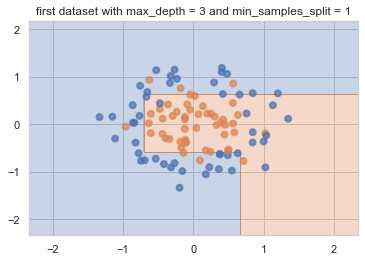

score for train sample is 0.8857142857142857
score for test sample is 0.7333333333333333


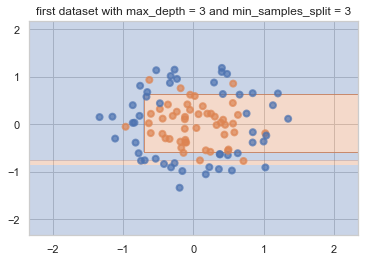

score for train sample is 0.8857142857142857
score for test sample is 0.7


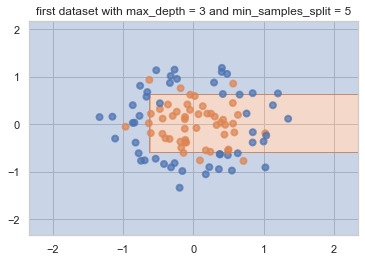

score for train sample is 0.8571428571428571
score for test sample is 0.8


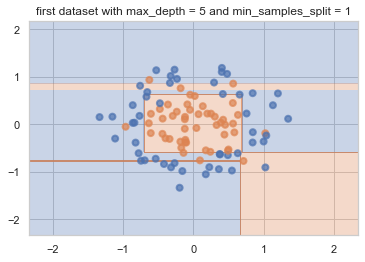

score for train sample is 0.9714285714285714
score for test sample is 0.7666666666666667


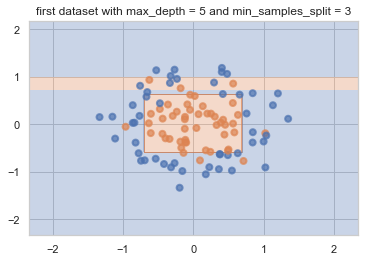

score for train sample is 0.9285714285714286
score for test sample is 0.8


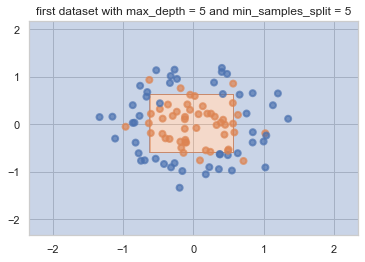

score for train sample is 0.8714285714285714
score for test sample is 0.9


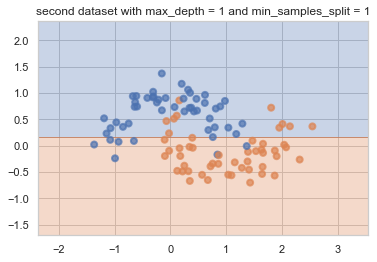

score for train sample is 0.8428571428571429
score for test sample is 0.8


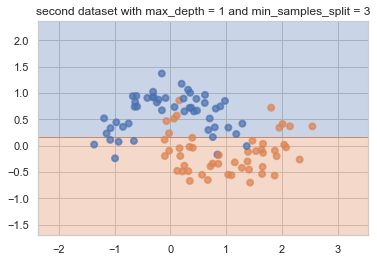

score for train sample is 0.8428571428571429
score for test sample is 0.8


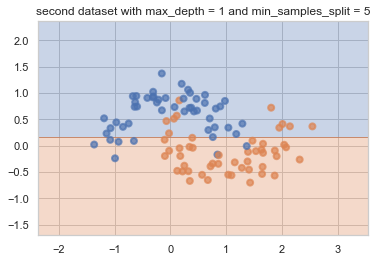

score for train sample is 0.8428571428571429
score for test sample is 0.8


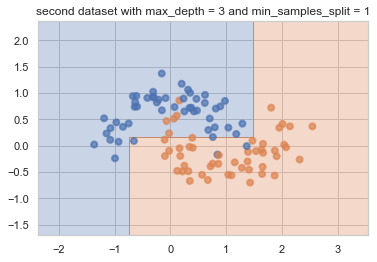

score for train sample is 0.9142857142857143
score for test sample is 0.9333333333333333


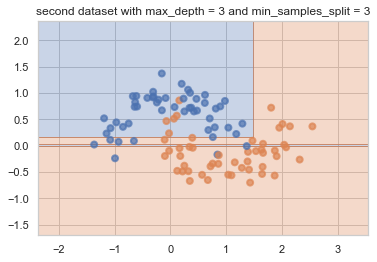

score for train sample is 0.9142857142857143
score for test sample is 0.8333333333333334


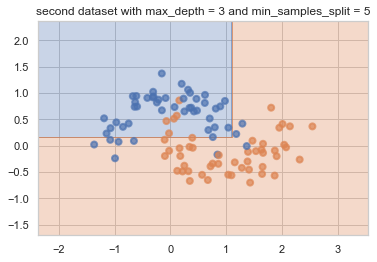

score for train sample is 0.8857142857142857
score for test sample is 0.8


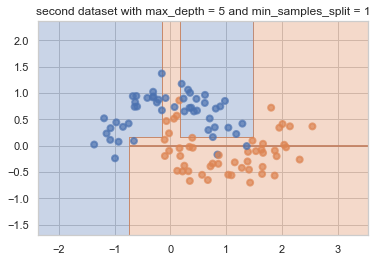

score for train sample is 1.0
score for test sample is 0.8666666666666667


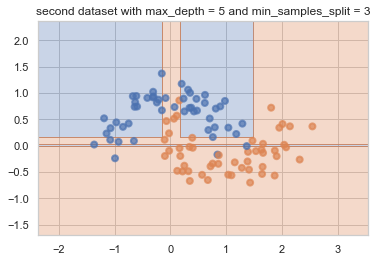

score for train sample is 0.9857142857142858
score for test sample is 0.7666666666666667


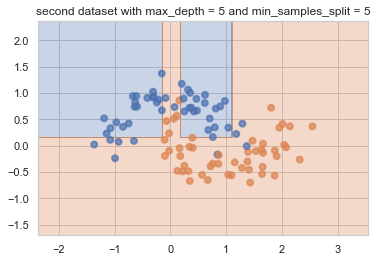

score for train sample is 0.9571428571428572
score for test sample is 0.7333333333333333


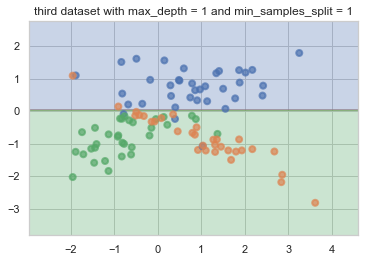

score for train sample is 0.6714285714285714
score for test sample is 0.6


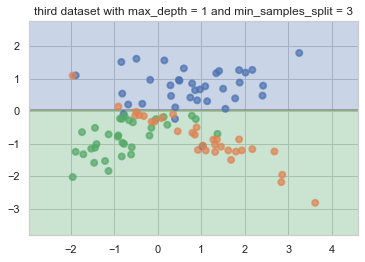

score for train sample is 0.6714285714285714
score for test sample is 0.6


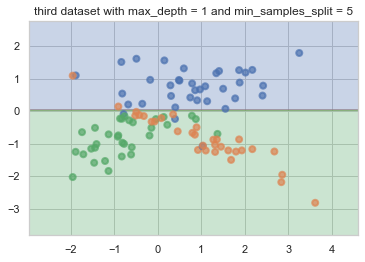

score for train sample is 0.6714285714285714
score for test sample is 0.6


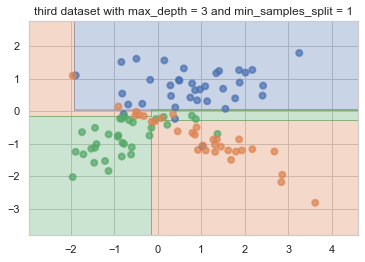

score for train sample is 0.9428571428571428
score for test sample is 0.8666666666666667


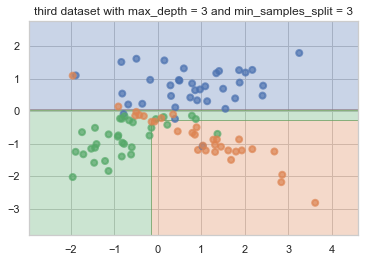

score for train sample is 0.9142857142857143
score for test sample is 0.7666666666666667


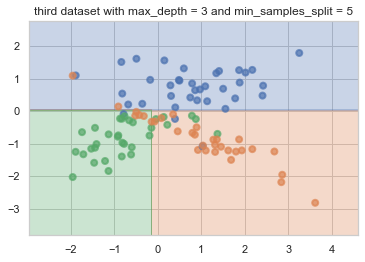

score for train sample is 0.8857142857142857
score for test sample is 0.7666666666666667


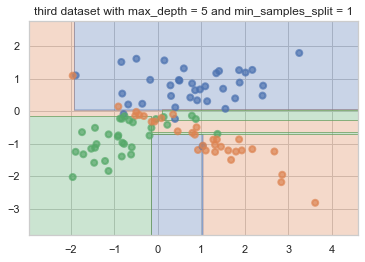

score for train sample is 0.9714285714285714
score for test sample is 0.7666666666666667


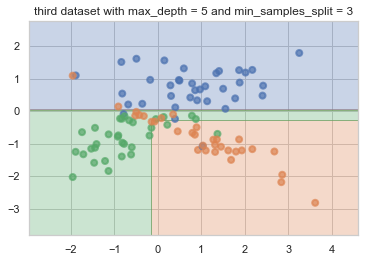

score for train sample is 0.9142857142857143
score for test sample is 0.7666666666666667


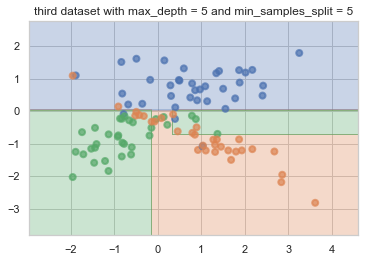

score for train sample is 0.9
score for test sample is 0.7


In [8]:
n = 27
max_depth = [1,3,5]
min_samples_leaf = [1,3,5]
for j in range(3):
    for d in max_depth:
        for s in min_samples_leaf:
            X, y = datasets[j]
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.3, random_state=42)
            clf  = DecisionTreeClassifier(max_depth = d, min_samples_leaf = s).fit(X_train, y_train)
            plot_surface(clf, X, y)
            print("score for train sample is", clf.score(X_train, y_train))
            print("score for test sample is", clf.score(X_test, y_test))

__Ответ:__ По полученным графикам и значениям accuracy видно, что деревья переобучаются, не совершая ошибок на обучающих, но ошибаясь на тестовых выборках

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [9]:
def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """

    sorted = np.argsort(feature_vector)
    feature_sort = feature_vector[sorted]
    target_sort_l = target_vector.astype(np.bool)[sorted][:-1]
    target_sort_r = target_vector.astype(np.bool)[sorted][-1:0:-1]

    thresholds = (feature_sort[:-1] + feature_sort[1:]) / 2

    l_len = np.arange(1, len(target_vector))
    r_len = len(target_vector) - l_len
    l = np.cumsum(target_sort_l) / l_len
    r = np.cumsum(target_sort_r)[-1::-1] / r_len

    ginis = -(2 * l * (1 - l) * l_len + 2 * r * (1 - r) * r_len) / len(target_vector)
    i_best = np.argmax(ginis)
    threshold_best = thresholds[i_best]
    gini_best = ginis[i_best]
    return thresholds, ginis, threshold_best, gini_best

    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

    pass

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [10]:
students = pd.read_csv("students.csv")
students

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,1
254,0.78,0.61,0.71,0.19,0.60,1
255,0.54,0.82,0.71,0.29,0.77,1
256,0.50,0.75,0.81,0.61,0.26,1


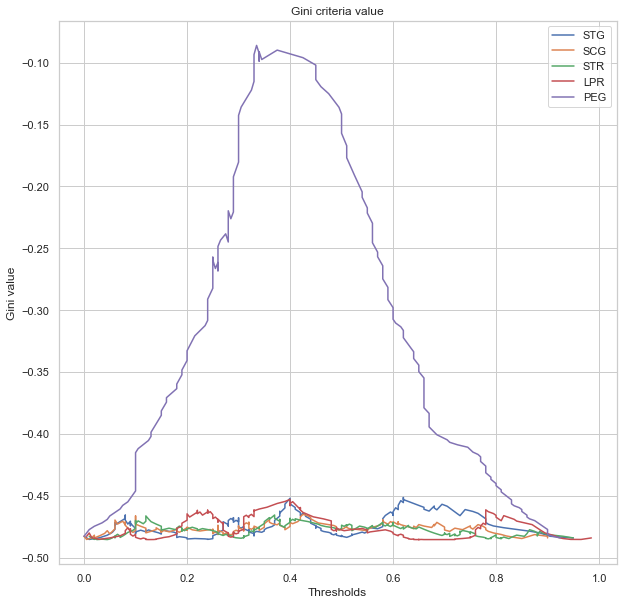

In [11]:
columns = students.columns.values[:-1]
target = students.columns.values[-1]
plt.figure(figsize=(10, 10))
for c in columns:
    x = students[c].as_matrix()
    y = students[target].as_matrix()
    
    plt.plot(find_best_split(x, y)[0], find_best_split(x, y)[1], label = c)
    plt.title('Gini criteria value')
    plt.xlabel("Thresholds")
    plt.ylabel("Gini value")
    plt.legend()

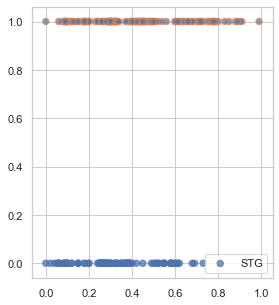

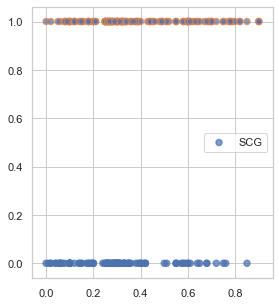

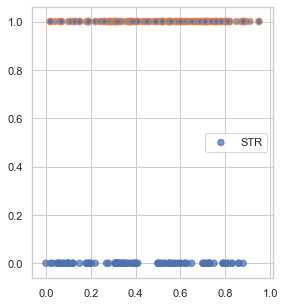

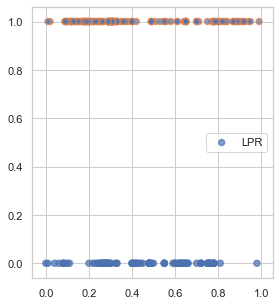

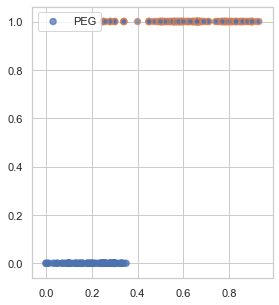

In [12]:
i = 0
for c in columns:
    x = students[c].as_matrix()
    y = students[target].as_matrix()
    plt.figure(figsize=(25, 5))
    plt.subplot(1, 5, i + 1)
    plt.scatter(x, y, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=1.5, label=c)
    plt.legend()
    ++i

__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

Смотря на графики, понимаем, что лучшее значение критерия информативности достигается при делении выборки на два поддерева по признаку PEG с порогом где-то примерно 0.4. Эту мысль подтверждает так же тот факт, что на скаттер графике PEG лучше всех коррелирует с таргетом. 

Насчет идеальных кривых, я думаю, что иделаьная должна быть с единичным пиком на одном конкретном пороге, совсем иделаьно, чтобы он был заострен и делил выборку на два почти иделаьно разделенных по классам поддерева. Наоборот, плохая кривая будет кривой без выпуклостей с низким значением критерия. По признакам с такими кривыми практически  невозможно поделить выборку.

**Ответ:**

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [13]:
import numpy as np
from collections import Counter

def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """

	#kekekek
    sorted = np.argsort(feature_vector)
    feature_sort = feature_vector[sorted]
    target_sort_l = target_vector.astype(np.bool)[sorted][:-1]
    target_sort_r = target_vector.astype(np.bool)[sorted][-1:0:-1]

    thresholds = (feature_sort[:-1] + feature_sort[1:]) / 2

    l_len = np.arange(1, len(target_vector))
    r_len = len(target_vector) - l_len
    l = np.cumsum(target_sort_l) / l_len
    r = np.cumsum(target_sort_r)[-1::-1] / r_len

    ginis = -((1 - l**2 - (1-l)**2) * l_len + (1 - r**2 - (1-r)**2) * r_len) / len(target_vector)
    mask = (feature_sort[1:] != feature_sort[:-1])
    ginis = ginis[mask]
    thresholds = thresholds[mask]
    i_best = np.argmax(ginis)
    threshold_best = thresholds[i_best]
    gini_best = ginis[i_best]
    return thresholds, ginis, threshold_best, gini_best

    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

    pass






class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node):
        if np.all(sub_y == sub_y[0]):  #
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(0, sub_X.shape[1]):
            if len(np.unique(sub_X[:, feature])) == 1:
                continue

            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))
            else:
                raise ValueError

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"])

    def _predict_node(self, x, node):
        if node["type"] == "terminal":
            return node["class"]

        feature = node["feature_split"]
        feature_type = self._feature_types[feature]

        if feature_type == "real":
            if x[feature] > node["threshold"]:
                return self._predict_node(x, node["right_child"])
            else:
                return self._predict_node(x, node["left_child"])
        elif feature_type == "categorical":
            if x[feature] in node["categories_split"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])


        # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

        pass
    
    def get_params(self, deep=True):
        return {'feature_types': self._feature_types}

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [14]:
mushrooms = pd.read_csv("agaricus-lepiota.data")
mushrooms

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [15]:
from sklearn.preprocessing import LabelEncoder
for column in mushrooms.columns.values:
    mushrooms[column] = LabelEncoder().fit_transform(mushrooms[column])
mushrooms

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8119,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8120,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8121,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
        mushrooms[mushrooms.columns.values[1:]].values, mushrooms[mushrooms.columns.values[0]].values, test_size=0.5, random_state=42)

from sklearn.metrics import accuracy_score

features = ["categorical"]*len(mushrooms.columns.values[1:])
clf = DecisionTree(features)
clf.fit(X_train, y_train)
print(accuracy_score(clf.predict(X_test), y_test))

1.0


__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [17]:
mushrooms = pd.read_csv("agaricus-lepiota_1.data")
tictactoe = pd.read_csv("tic-tac-toe.data")
car = pd.read_csv("car.data")
nursery = pd.read_csv("nursery.data")

In [18]:
for i in range (len(car['unacc'])):
    if car.loc[i, 'unacc'] == 'unacc' or car.loc[i, 'unacc'] == 'acc':
        car.loc[i, 'unacc'] = 0
    else:
        car.loc[i, 'unacc'] = 1
for i in range (len(nursery['recommend'])):
    if nursery.loc[i, 'recommend'] == 'not_recom' or nursery.loc[i, 'recommend'] == 'recommend':
        nursery.loc[i, 'recommend'] = 0
    else:
        nursery.loc[i, 'recommend'] = 1

In [19]:
mushrooms = mushrooms.apply(LabelEncoder().fit_transform, axis=0)
tictactoe = tictactoe.apply(LabelEncoder().fit_transform, axis=0)
car = car.apply(LabelEncoder().fit_transform, axis=0)
nursery = nursery.apply(LabelEncoder().fit_transform, axis=0)
datasets = [mushrooms, tictactoe, car, nursery]

In [20]:
mushrooms

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8119,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8120,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8121,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [21]:
tictactoe

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,2,2,2,2,1,1,1,2,1,1
1,2,2,2,2,1,1,1,1,2,1
2,2,2,2,2,1,1,1,0,0,1
3,2,2,2,2,1,1,0,1,0,1
4,2,2,2,2,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
952,1,2,2,2,1,1,1,2,2,0
953,1,2,1,2,2,1,2,1,2,0
954,1,2,1,2,1,2,2,1,2,0
955,1,2,1,1,2,2,2,1,2,0


In [22]:
car

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,0
1,3,3,0,0,2,0,0
2,3,3,0,0,1,1,0
3,3,3,0,0,1,2,0
4,3,3,0,0,1,0,0
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,1
1724,1,1,3,2,0,1,0
1725,1,1,3,2,0,2,1


In [23]:
nursery

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,2,3,0,0,0,0,0,1,1
1,2,3,0,0,0,0,0,0,0
2,2,3,0,0,0,0,2,2,0
3,2,3,0,0,0,0,2,1,1
4,2,3,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...
12954,0,4,2,3,1,1,2,1,1
12955,0,4,2,3,1,1,2,0,0
12956,0,4,2,3,1,1,1,2,1
12957,0,4,2,3,1,1,1,1,1


In [24]:
result = [
    [0,0,0,0],
    [0,0,0,0],
    [0,0,0,0],
    [0,0,0,0]
]

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder
for i in range(len(datasets)):
    d = datasets[i]
    if i == 0:
        data = d.copy()
        del data ['p']
        target = d['p']
    if i == 1:
        data = d.copy()
        del data ['positive']
        target = d['positive']
    if i == 2:
        data = d.copy()
        del data ['unacc']
        target = d['unacc']
    if i == 3:
        data = d.copy()
        del data ['recommend']
        target = d['recommend']
    result[i][0] = cross_val_score(DecisionTree(feature_types = ["real"] * data.to_numpy().shape[1]), data.as_matrix(), target.as_matrix(), scoring=make_scorer(accuracy_score), cv=10).mean()
    result[i][1] = cross_val_score(DecisionTree(feature_types = ["categorical"] * data.to_numpy().shape[1]), data.as_matrix(), target.as_matrix(), scoring=make_scorer(accuracy_score), cv=10).mean()
    ohe = OneHotEncoder(handle_unknown="ignore")
    ohe_data_m = ohe.fit(data).transform(data).toarray()
    result[i][2] = cross_val_score(DecisionTree(feature_types = ["real"] * ohe_data_m.shape[1]),ohe_data_m , target.as_matrix(), scoring=make_scorer(accuracy_score), cv=10).mean()
    #result[i][2] = cross_val_score(DecisionTree(feature_types = ["real"] * data.shape[1]),data , target.as_matrix(), scoring=make_scorer(accuracy_score), cv=10).mean()
    result[i][3] = cross_val_score(DecisionTreeClassifier(), data.as_matrix(), target.ravel(), cv=10, scoring=make_scorer(accuracy_score)).mean()

In [26]:
df_result = pd.DataFrame(result)
df_result

,0,1,2,3
0,0.999261,1.000000,0.999631,0.962716
1,0.467939,0.549265,0.553520,0.755986
2,0.939693,0.967519,0.921767,0.940374
3,0.999846,0.999923,0.999769,0.999846


__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**


Очевидно, что на разных данных алгоритмы работают по разному. В первую очередь это вызвано зависимостью качества от самого датасета. Вдобавок, One-hot не всегда оказывается полезным для решения задачи. Так, например, для порядковых переменных стоит делать Label encoder, для остальных следует использовать dummy переменные. Насчет случайной компоненты - допустим, разные сплиты дают одинаковое значение критерия. Тогда алгоритм выбирает случайный, и из-за перемешивания признаков каждый раз случайный будет разным. Конечно, на это можно повлиять, но я не думаю, что это сильно улучшит качество алгоритма, так как одинаковые сплиты все равно дают одинаковое значение критерия и в следствие этого нам все равно как разбивать, так как мы не знаем, как оно будет вести себя на тестовой выборке